# Unified Model with Multiple Strategic Agents

James Yu, 12 October 2022

In [1]:
from collections import namedtuple #,defaultdict
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv as npinv
from numpy.linalg import matrix_power as nppow

## Symmetric Network-Symmetric Strategic Agents Case

- $A$ is symmetric and Markov
- there are $L$ identical strategic agents, each with the same agenda $0$
- want to observe convergence speed as a function of $L$

In [2]:
def finite_solution(A, delta, c, T, x_0, L = 1):
    n = len(x_0)
    eps = np.finfo(np.float64).eps
    I = np.identity(n)
    eigvals, U = np.linalg.eig(A)
    chi_0 = U.T @ x_0
    D = np.diag(eigvals)
    K_t = I
    K_sequence = [K_t]
    
    for i in range(T): # generate solution matrices
        K_t_new = I + c * delta * (delta * K_t + c * I) @ nppow(npinv(L * delta * K_t + c * I), 2) @ K_t @ nppow(D, 2)
        K_sequence.insert(0, K_t_new)
        #if np.allclose(K_t, K_t_new, rtol = eps, atol = eps) and i >= T: break
        K_t = K_t_new

    chi_ts = [chi_0]
    chi_var = chi_0
    gamma_ts = []
    #K_ss = K_sequence[0]
    #L_ss = -inv(B.T @ K_ss @ B + c * I / delta) @ B.T @ K_ss @ A
    
    payoff = 0
    stage_payoffs = []
    discounted_stage_payoffs = []
    cumulative_payoffs = []

    for i, K in enumerate(K_sequence[1:]): # while True
        gamma_t = -delta * npinv(c * I + L * delta * K) @ K @ D @ chi_var
        gamma_ts.append(gamma_t)
        p = -(chi_var.T @ chi_var + c * gamma_t.T @ gamma_t).item()
        payoff += delta**i * p
        stage_payoffs.append(p)
        discounted_stage_payoffs.append(delta**i * p)
        cumulative_payoffs.append(payoff)
        chi_var_new = D @ chi_var + L * gamma_t
        chi_ts.append(chi_var_new)
        #if np.allclose(chi_var, chi_var_new, rtol = eps, atol = eps): break
        chi_var = chi_var_new
        # i += 1
        
    Results = namedtuple("Results", ["chi_ts", "gamma_ts", "K_ts", "payoff", "stage_payoffs", "discounted_stage_payoffs", "cumulative_payoffs"])
    return Results(chi_ts, gamma_ts, K_sequence, payoff, stage_payoffs, discounted_stage_payoffs, cumulative_payoffs)#, K_ss, L_ss

In [3]:
# taken from higher_cost_version.ipynb
A = np.array([ # balanced
    [0.48, 0.3, 0.22],
    [0.3, 0.52, 0.18],
    [0.22, 0.18, 0.6]
])

A_alt = np.array([ # stubborn
    [0.9, 0.07, 0.03],
    [0.07, 0.58, 0.35],
    [0.03, 0.35, 0.62]
])

In [4]:
x_0 = np.array([[10.0, -5.0, 5.0]], ndmin = 2).T

### Experiment 0: Just the basic single-agent model from `higher_cost_version.ipynb` as a sanity check

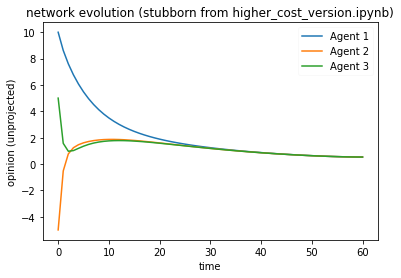

In [5]:
eigvals_alt, U_alt = np.linalg.eig(A_alt)
ex0 = finite_solution(A_alt, 0.9, 200.0, 60, x_0, L = 1)
for i in range(3):
    plt.plot(range(60+1), [(U_alt @ ex0.chi_ts)[j][i].item() for j in range(60+1)], label = f"Agent {i+1}")
    
plt.xlabel("time")
plt.ylabel("opinion (unprojected)")
plt.title("network evolution (stubborn from higher_cost_version.ipynb)")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

This should match the original notebook, so we can proceed.

### Experiment 1: $L = 1$ benchmarking case

In [6]:
delta = 0.9
c = 1.0
T = 3

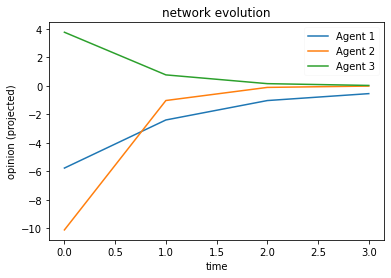

In [7]:
ex1 = finite_solution(A, delta, c, T, x_0, L = 1)
for i in range(3):
    plt.plot(range(T+1), [ex1.chi_ts[j][i].item() for j in range(T+1)], label = f"Agent {i+1}")
    
plt.xlabel("time")
plt.ylabel("opinion (projected)")
plt.title("network evolution")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

### Experiment 2: $L = 2$

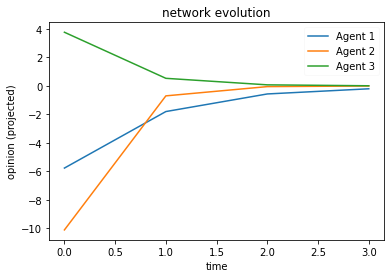

In [8]:
ex2 = finite_solution(A, delta, c, T, x_0, L = 2)
for i in range(3):
    plt.plot(range(T+1), [ex2.chi_ts[j][i].item() for j in range(T+1)], label = f"Agent {i+1}")
    
plt.xlabel("time")
plt.ylabel("opinion (projected)")
plt.title("network evolution")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

### Experiment 3: $L = 5$

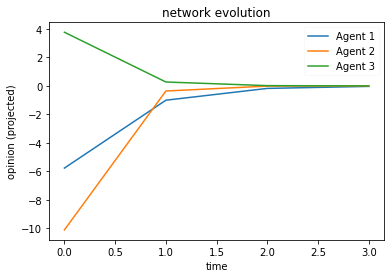

In [9]:
ex3 = finite_solution(A, delta, c, T, x_0, L = 5)
for i in range(3):
    plt.plot(range(T+1), [ex3.chi_ts[j][i].item() for j in range(T+1)], label = f"Agent {i+1}")
    
plt.xlabel("time")
plt.ylabel("opinion (projected)")
plt.title("network evolution")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

### Experiment 4: $L = 100$

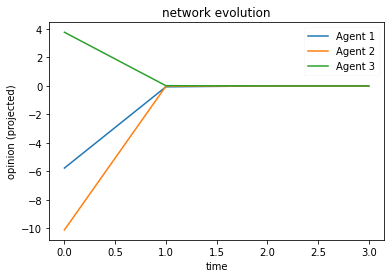

In [10]:
ex4 = finite_solution(A, delta, c, T, x_0, L = 100)
for i in range(3):
    plt.plot(range(T+1), [ex4.chi_ts[j][i].item() for j in range(T+1)], label = f"Agent {i+1}")
    
plt.xlabel("time")
plt.ylabel("opinion (projected)")
plt.title("network evolution")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

### Overlay

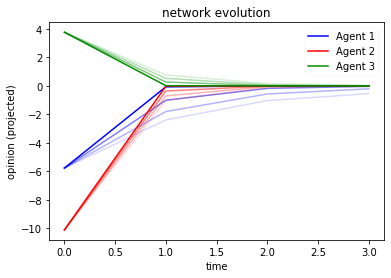

In [11]:
colors = [(0,0,1), (1,0,0), (0,0.55,0)]
alphas = [0.15, 0.3, 0.5, 1]
for i in range(3):
    for j, exp in enumerate([ex1, ex2, ex3, ex4]):
        plt.plot(range(T+1), [exp.chi_ts[t][i].item() for t in range(T+1)], color = colors[i] + (alphas[j],), label = [None, f"Agent {i+1}"][j == 3])

plt.xlabel("time")
plt.ylabel("opinion (projected)")
plt.title("network evolution")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

Here blue, red and green are naive agents 1, 2 and 3; the lighter shades represent earlier experiments (smaller $L$) and the darker ones later experiments (higher $L$). From this we can conclude that increasing $L$ decreases the absolute value of $\tilde \chi_t$. We can also check the messages:

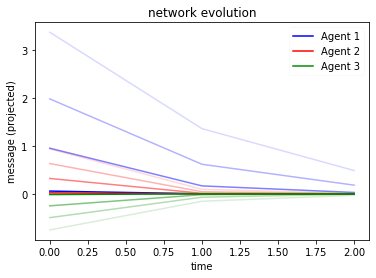

In [12]:
for i in range(3):
    for j, exp in enumerate([ex1, ex2, ex3, ex4]):
        plt.plot(range(T), [exp.gamma_ts[t][i].item() for t in range(T)], color = colors[i] + (alphas[j],), label = [None, f"Agent {i+1}"][j == 3])

plt.xlabel("time")
plt.ylabel("message (projected)")
plt.title("network evolution")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

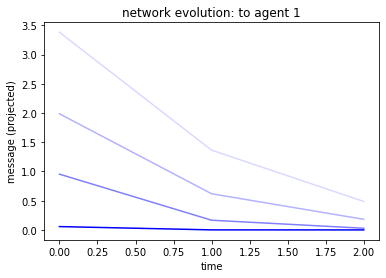

In [13]:
for j, exp in enumerate([ex1, ex2, ex3, ex4]):
    plt.plot(range(T), [exp.gamma_ts[t][0].item() for t in range(T)], color = colors[0] + (alphas[j],))

plt.xlabel("time")
plt.ylabel("message (projected)")
plt.title("network evolution: to agent 1")
plt.show()

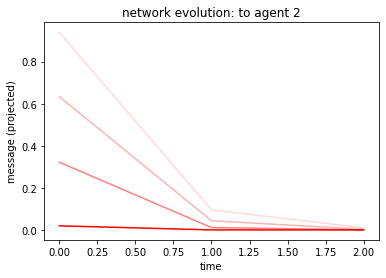

In [14]:
for j, exp in enumerate([ex1, ex2, ex3, ex4]):
    plt.plot(range(T), [exp.gamma_ts[t][1].item() for t in range(T)], color = colors[1] + (alphas[j],))

plt.xlabel("time")
plt.ylabel("message (projected)")
plt.title("network evolution: to agent 2")
plt.show()

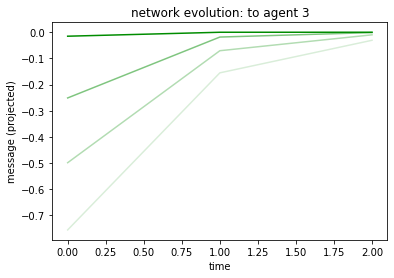

In [15]:
for j, exp in enumerate([ex1, ex2, ex3, ex4]):
    plt.plot(range(T), [exp.gamma_ts[t][2].item() for t in range(T)], color = colors[2] + (alphas[j],))

plt.xlabel("time")
plt.ylabel("message (projected)")
plt.title("network evolution: to agent 3")
plt.show()

The same property holds for the projected messages.

### Experiments 5-8: what if we increase $c$?

In [16]:
c = 10.0
T = 15

We check the opinions:

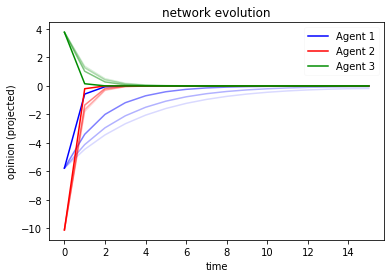

In [17]:
ex5_8 = [finite_solution(A, delta, c, T, x_0, L = L) for L in [1, 2, 5, 100]]
for i in range(3):
    for j, exp in enumerate(ex5_8):
        plt.plot(range(T+1), [exp.chi_ts[t][i].item() for t in range(T+1)], color = colors[i] + (alphas[j],), label = [None, f"Agent {i+1}"][j == 3])

plt.xlabel("time")
plt.ylabel("opinion (projected)")
plt.title("network evolution")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

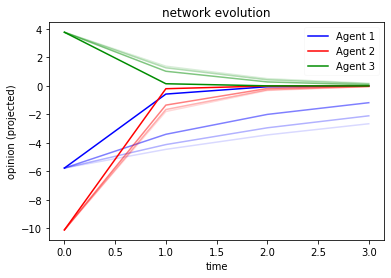

In [18]:
for i in range(3):
    for j, exp in enumerate(ex5_8):
        plt.plot(range(4), [exp.chi_ts[t][i].item() for t in range(4)], color = colors[i] + (alphas[j],), label = [None, f"Agent {i+1}"][j == 3])

plt.xlabel("time")
plt.ylabel("opinion (projected)")
plt.title("network evolution")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

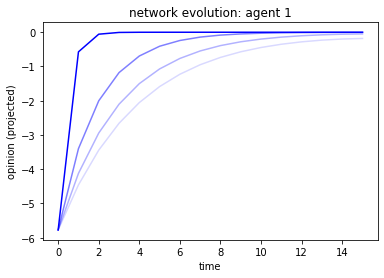

In [19]:
for j, exp in enumerate(ex5_8):
    plt.plot(range(T+1), [exp.chi_ts[t][0].item() for t in range(T+1)], color = colors[0] + (alphas[j],))
plt.xlabel("time")
plt.ylabel("opinion (projected)")
plt.title("network evolution: agent 1")
plt.show()

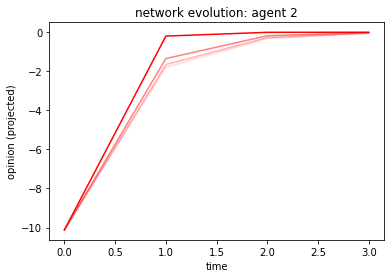

In [20]:
for j, exp in enumerate(ex5_8):
    plt.plot(range(4), [exp.chi_ts[t][1].item() for t in range(4)], color = colors[1] + (alphas[j],))
plt.xlabel("time")
plt.ylabel("opinion (projected)")
plt.title("network evolution: agent 2")
plt.show()

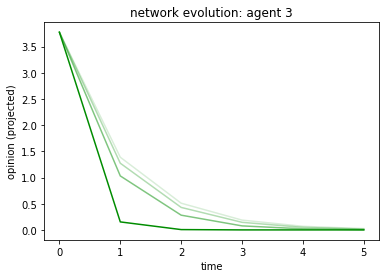

In [21]:
for j, exp in enumerate(ex5_8):
    plt.plot(range(6), [exp.chi_ts[t][2].item() for t in range(6)], color = colors[2] + (alphas[j],))
plt.xlabel("time")
plt.ylabel("opinion (projected)")
plt.title("network evolution: agent 3")
plt.show()

and the messages:

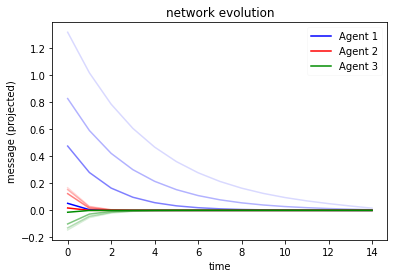

In [22]:
for i in range(3):
    for j, exp in enumerate(ex5_8):
        plt.plot(range(T), [exp.gamma_ts[t][i].item() for t in range(T)], color = colors[i] + (alphas[j],),  label = [None, f"Agent {i+1}"][j == 3])

plt.xlabel("time")
plt.ylabel("message (projected)")
plt.title("network evolution")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

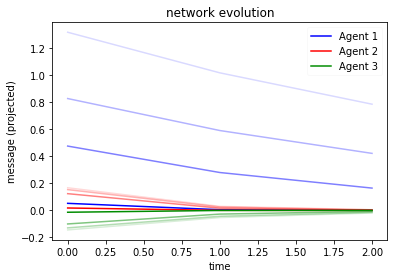

In [23]:
for i in range(3):
    for j, exp in enumerate(ex5_8):
        plt.plot(range(3), [exp.gamma_ts[t][i].item() for t in range(3)], color = colors[i] + (alphas[j],),  label = [None, f"Agent {i+1}"][j == 3])

plt.xlabel("time")
plt.ylabel("message (projected)")
plt.title("network evolution")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

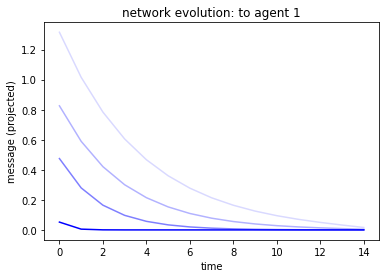

In [24]:
for j, exp in enumerate(ex5_8):
    plt.plot(range(T), [exp.gamma_ts[t][0].item() for t in range(T)], color = colors[0] + (alphas[j],))
plt.xlabel("time")
plt.ylabel("message (projected)")
plt.title("network evolution: to agent 1")
plt.show()

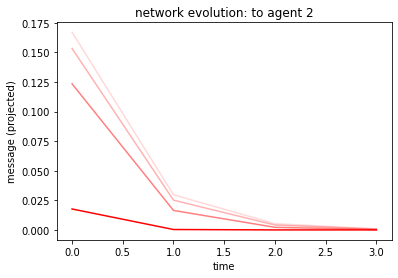

In [25]:
for j, exp in enumerate(ex5_8):
    plt.plot(range(4), [exp.gamma_ts[t][1].item() for t in range(4)], color = colors[1] + (alphas[j],))
plt.xlabel("time")
plt.ylabel("message (projected)")
plt.title("network evolution: to agent 2")
plt.show()

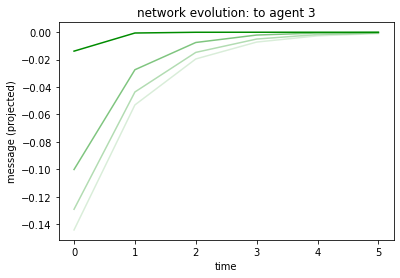

In [26]:
for j, exp in enumerate(ex5_8):
    plt.plot(range(6), [exp.gamma_ts[t][2].item() for t in range(6)], color = colors[2] + (alphas[j],))
plt.xlabel("time")
plt.ylabel("message (projected)")
plt.title("network evolution: to agent 3")
plt.show()

The same results hold with the higher cost.